In [22]:
from tifffile import imread
import os, glob
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
import skimage.io as io
import cv2
import pickle as pkl

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logging.info('test')

04:01:18 INFO:test


In [2]:
cmap = {'MES-like': 'pink',
 'DC': (0.6823529411764706,0.7803921568627451,0.9098039215686274,1.0),
 'CD4/CD8': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'Endothelial': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'Astrocyte': (0.17254901960784313,0.6274509803921569,0.17254901960784313,1.0),
 'AC-like': '#447c69',
 'Mast': (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 'Mono': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 'Mural cell': (0.7725490196078432,0.6901960784313725,0.8352941176470589,1.0),
 'NK': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 'NPC-like': '#5384db',
 'OPC-like': '#9cba19',
 'RG': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 'TAM-BDM': (0.4580392156862745, 0.4580392156862745, 0.4580392156862745, 1.0),
 'OPC': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 'Oligodendrocyte': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0),
 'TAM-MG': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)}

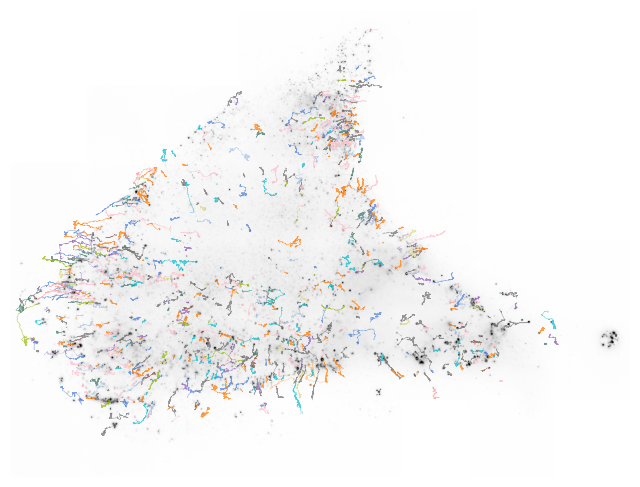

In [4]:
im = imread('data/EV39_last_timestep.tif')
bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

tracks = np.load('data/EV39_tracks.npy')
df = pd.read_csv('data/EV39_metrics.csv')
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='Greys')
plt.axis('off');

t = tracks.shape[-1]
for i in np.where(df['Aligned_to_Xenium'])[0]:
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c=cmap[df['Labels_GBMap'][i]], lw=.35, alpha=.75)

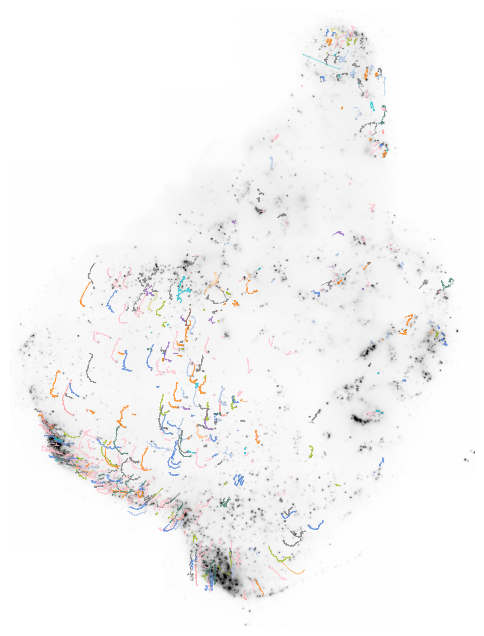

In [5]:
im = imread('data/EV37_last_timestep.tif')
bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

tracks = np.load('data/EV37_tracks.npy')
df = pd.read_csv('data/EV37_metrics.csv')
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='Greys')
plt.axis('off');

t = tracks.shape[-1]
for i in np.where(df['Aligned_to_Xenium'])[0]:
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c=cmap[df['Labels_GBMap'][i]], lw=.35, alpha=.75)

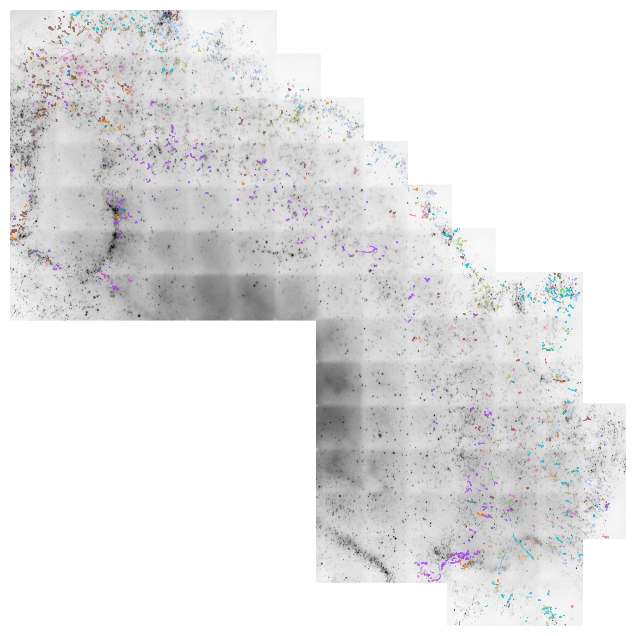

In [7]:
im = imread('data/EV38_last_timestep.tif')
bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

tracks = np.load('data/EV38_tracks.npy')
df = pd.read_csv('data/EV38_metrics.csv')
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='Greys')
plt.axis('off');

t = tracks.shape[-1]
for i in np.where(df['Aligned_to_Xenium'])[0]:
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c=df['Cluster_colors'][i], lw=.35, alpha=.75)

## Bar plot

/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


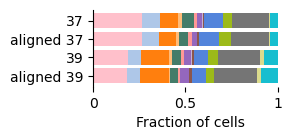

In [19]:
## Plot a distribution bar graph
path_adata = '/date/sl/embryoscope/folder_shared/Xenium_anndata/'
adata = sc.read_h5ad(path_adata + 'GBM_annotated.h5ad')

key = 'annotation_level_3'

EV37_all = adata.obs.replicate == 'EV37_TL'
EV37_aligned = EV37_all & adata.obs.timelapse_aligned
EV39_all = np.array([x in ['EV39_TL_A', 'EV39_TL_B', 'EV39_TL_C'] for x in adata.obs.replicate])
EV39_aligned = EV39_all & adata.obs.timelapse_aligned

plt.figure(figsize=(2.5,1))
bottoms = np.zeros(4).astype('float')

totals = np.array([np.sum(EV39_aligned), np.sum(EV39_all), np.sum(EV37_aligned), np.sum(EV37_all)])

for k in cmap:
    vals = np.array([np.sum(np.array(adata.obs[key]==k)[EV39_aligned]),
                     np.sum(np.array(adata.obs[key]==k)[EV39_all]),
                     np.sum(np.array(adata.obs[key]==k)[EV37_aligned]),
                     np.sum(np.array(adata.obs[key]==k)[EV37_all])])/ totals
     
    plt.barh(np.arange(4), width=vals, left=bottoms, color=cmap[k])
    bottoms += vals

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(np.arange(4),['aligned 39', '39', 'aligned 37', '37'])
plt.xticks([0,.5,1],[0,.5,1]);
plt.xlabel('Fraction of cells');

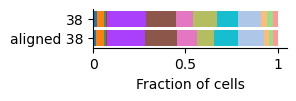

In [18]:
## Plot a distribution bar graph
key = 'Annotation'

adata_cortex = sc.read_h5ad(path_adata + 'Cortex.h5ad')
adata_cortex.uns['log1p']["base"] = None
cmap2=dict(zip(np.unique(adata_cortex.obs[key]),adata_cortex.uns[key+'_colors']))

EV38_all = adata_cortex.obs.replicate == 'EV38_TL_B'
EV38_aligned = EV38_all & adata_cortex.obs.timelapse_aligned

plt.figure(figsize=(2.5,.5))
bottoms = np.zeros(2).astype('float')

totals = np.array([np.sum(EV38_aligned), np.sum(EV38_all)])

for k in cmap2:
    vals = np.array([np.sum(np.array(adata_cortex.obs[key]==k)[EV38_aligned]),
                     np.sum(np.array(adata_cortex.obs[key]==k)[EV38_all])])/ totals
     
    plt.barh(np.arange(2), width=vals, left=bottoms, color=cmap2[k])
    bottoms += vals

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks(np.arange(2),['aligned 38', '38'])
plt.xticks([0,.5,1],[0,.5,1]);
plt.xlabel('Fraction of cells');

## Metrics per cell type

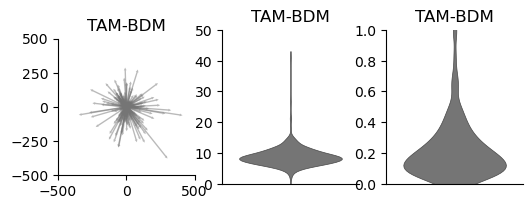

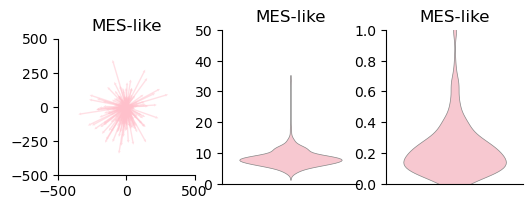

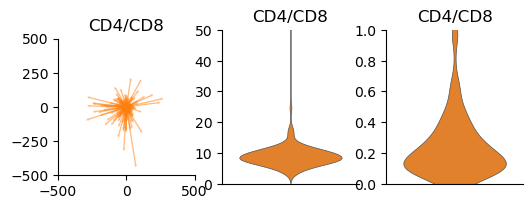

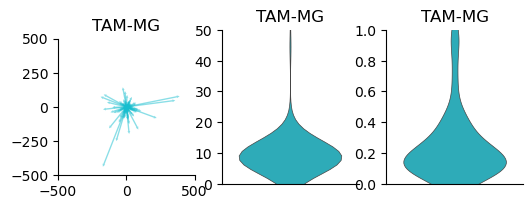

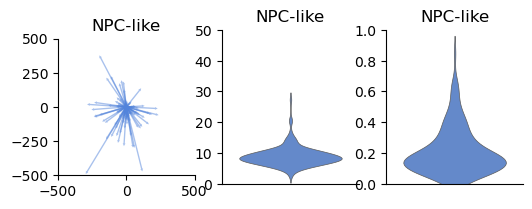

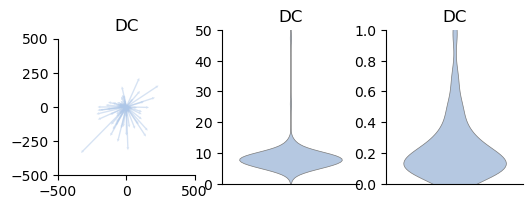

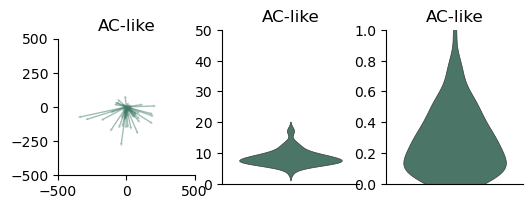

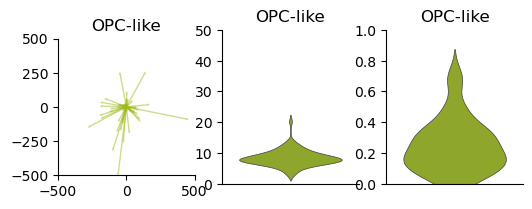

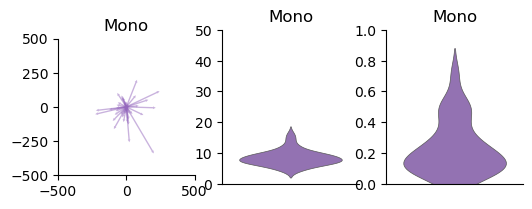

In [29]:
from collections import Counter
mx_disp = 500
mx_D = 500
mx_D2 = 1500
mx_m = 50

metrics = pkl.load(open('data/cell_type_movement_gbm.pkl', 'rb'))

valid_labels = ['TAM-BDM', 'MES-like', 'CD4/CD8', 'TAM-MG', 'NPC-like', 'DC', 'AC-like', 'OPC-like', 'Mono']
for ctype in valid_labels:
    disp = metrics['Displacement'][ctype]
    mean_move = metrics['Mean_movement'][ctype]
    meander = metrics['Meandering'][ctype]
    
    fig, ax = plt.subplots(1,3, figsize=(6,2))
    ax[0].quiver(np.zeros(disp.shape[0]), np.zeros(disp.shape[0]), 
               disp[:,0], disp[:,1],
               angles='xy', scale_units='xy', scale=1,
               width=.01, headwidth=2, headlength=2, headaxislength=2,
               color = cmap[ctype], alpha=.5
              )
    ax[0].set_xlim([-mx_disp,mx_disp])
    ax[0].set_ylim([-mx_disp,mx_disp])
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].set_aspect('equal')
    ax[0].set_title(ctype)

    sns.violinplot(mean_move, ax=ax[1], color=cmap[ctype], alpha=.5, 
                   linewidth = .5, width=.75, inner=None)
    ax[1].set_title(ctype)
    ax[1].set_ylim([0,mx_m])
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].set_xticks([])

    sns.violinplot(meander, ax=ax[2], color=cmap[ctype], alpha=.5, 
                   linewidth = .5, width=.75, inner=None)
    ax[2].set_title(ctype)
    ax[2].set_ylim([0,1])
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    ax[2].set_xticks([])

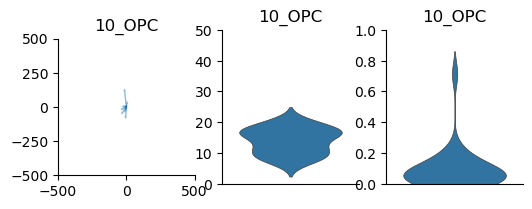

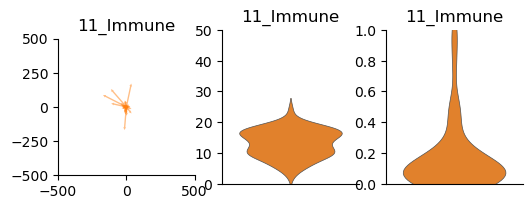

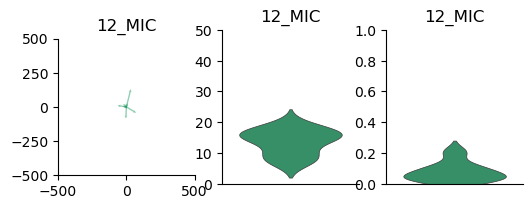

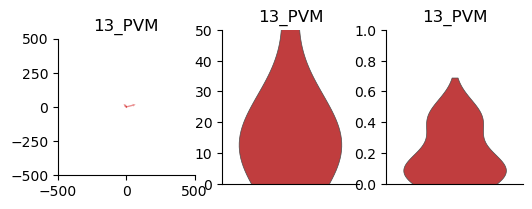

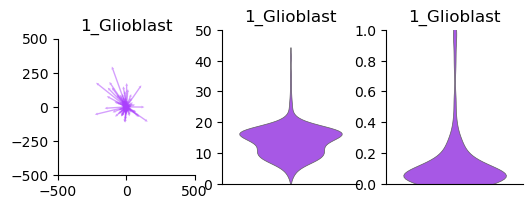

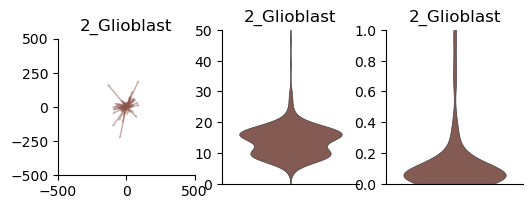

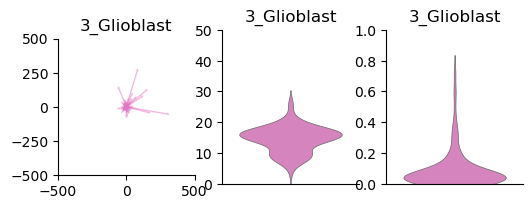

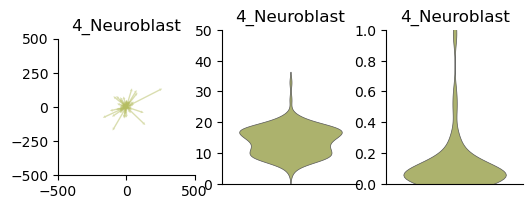

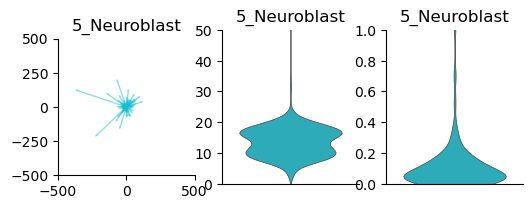

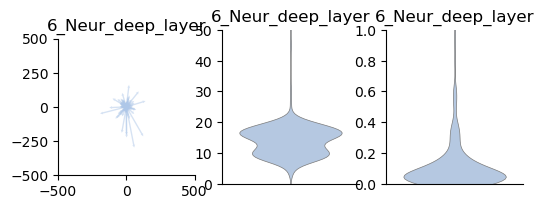

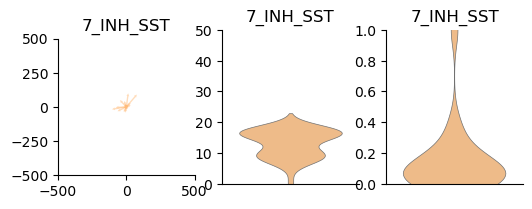

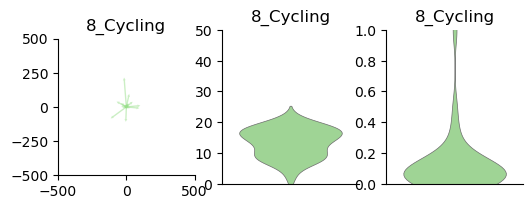

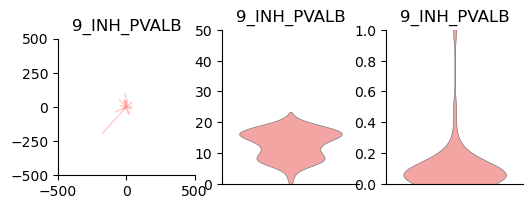

In [32]:
from collections import Counter
mx_disp = 500
mx_D = 500
metrics = pkl.load(open('data/cell_type_movement_cortex.pkl', 'rb'))

cmap_cortex = {'10_OPC': '#1f77b4',
 '11_Immune': '#ff7f0e',
 '12_MIC': '#279e68',
 '13_PVM': '#d62728',
 '1_Glioblast': '#aa40fc',
 '2_Glioblast': '#8c564b',
 '3_Glioblast': '#e377c2',
 '4_Neuroblast': '#b5bd61',
 '5_Neuroblast': '#17becf',
 '6_Neur_deep_layer': '#aec7e8',
 '7_INH_SST': '#ffbb78',
 '8_Cycling': '#98df8a',
 '9_INH_PVALB': '#ff9896'}

valid_labels = ['10_OPC', '11_Immune', '12_MIC', '13_PVM', '1_Glioblast',
       '2_Glioblast', '3_Glioblast', '4_Neuroblast', '5_Neuroblast',
       '6_Neur_deep_layer', '7_INH_SST', '8_Cycling', '9_INH_PVALB']

for ctype in valid_labels:
    disp = metrics['Displacement'][ctype]
    mean_move = metrics['Mean_movement'][ctype]
    meander = metrics['Meandering'][ctype]
    
    fig, ax = plt.subplots(1,3, figsize=(6,2))
    ax[0].quiver(np.zeros(disp.shape[0]), np.zeros(disp.shape[0]), 
               disp[:,0], disp[:,1],
               angles='xy', scale_units='xy', scale=1,
               width=.01, headwidth=2, headlength=2, headaxislength=2,
               color = cmap_cortex[ctype], alpha=.5
              )
    ax[0].set_xlim([-mx_disp,mx_disp])
    ax[0].set_ylim([-mx_disp,mx_disp])
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].set_aspect('equal')
    ax[0].set_title(ctype)

    sns.violinplot(mean_move, ax=ax[1], color=cmap_cortex[ctype], alpha=.5, 
                   linewidth = .5, width=.75, inner=None)
    ax[1].set_title(ctype)
    ax[1].set_ylim([0,mx_m])
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].set_xticks([])

    sns.violinplot(meander, ax=ax[2], color=cmap_cortex[ctype], alpha=.5, 
                   linewidth = .5, width=.75, inner=None)
    ax[2].set_title(ctype)
    ax[2].set_ylim([0,1])
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    ax[2].set_xticks([])

## Brownian motion and Mean Squared Displacement

In [38]:
import numpy as np

def estimate_delta_from_variable_length_2d_tracks(tracks, dt, n_steps):
    """
    Estimate delta from a list of 2D Brownian motion tracks of varying lengths.

    Parameters:
        tracks: list of numpy arrays, each of shape (n_steps, 2)
        dt: float, time step

    Returns:
        delta_est: estimated delta
    """
    max_lag = n_steps // 2  # to reduce noise at large lags
    msd = np.zeros(max_lag)
    counts = np.zeros(max_lag)

    for lag in range(1, max_lag):
        sum_sq_disp = 0
        count = 0
        for track in tracks:
            if track.shape[0] > lag:
                displacements = track[lag:] - track[:-lag]
                squared_displacements = np.sum(displacements**2, axis=1)
                sum_sq_disp += np.sum(squared_displacements)
                count += len(squared_displacements)
        if count > 0:
            msd[lag] = sum_sq_disp / count
            counts[lag] = count
        else:
            msd[lag] = np.nan  # or leave as 0
            
    tau = np.arange(max_lag) * dt
    valid = counts > 0

    # MSD = delta^2 * d * tau  --> slope = delta^2 * d
    d = 2  # dimensions
    slope, _ = np.polyfit(tau[valid][1:], msd[valid][1:], 1)
    delta_squared = slope / d
    delta = np.sqrt(delta_squared)
    return delta, msd, counts
def plot_msd_curve(msd, dt, counts=None, label=None, loglog=False, fit_range=(1, None)):
    """
    Plot the MSD curve.

    Parameters:
        msd: 1D numpy array of MSD values (may contain NaNs)
        dt: float, time step size
        counts: (optional) number of samples used per lag, same length as msd
        label: (optional) label for the MSD curve
        loglog: bool, if True, plot on log-log scale
        fit_range: tuple (start_idx, end_idx), index range to show linear fit
    """
    msd = np.asarray(msd)
    tau = np.arange(len(msd)) * dt
    valid = (~np.isnan(msd)) & (msd > 0)

    # Plot MSD curve
    plt.figure(figsize=(6, 4))
    if loglog:
        plt.loglog(tau[valid], msd[valid], label=label or 'MSD')
    else:
        plt.plot(tau[valid], msd[valid], label=label or 'MSD')

    if fit_range[1] is None:
        fit_range = (fit_range[0], len(msd))
    start, end = fit_range
    tau_fit = tau[start:end]
    msd_fit = msd[start:end]
    fit_valid = (~np.isnan(msd_fit) & (msd_fit > 0))

    if np.sum(fit_valid) >= 2:
        slope, intercept = np.polyfit(tau_fit[fit_valid], msd_fit[fit_valid], 1)
        fit_line = slope * tau_fit + intercept
        plt.plot(tau_fit[fit_valid], fit_line[fit_valid], 'r--', label=f'Linear fit\nslope={slope:.3g}')
        
    plt.xlabel("Time lag τ")
    plt.ylabel("MSD(τ)")
    plt.title("Mean Squared Displacement")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

In [39]:
## Get cell type MSD and 
all_labels = ['AC-like', 'CD4/CD8', 'DC', 'Endothelial', 'MES-like', 'Mast', 'Mono', 'Mural cell', 
              'NK', 'NPC-like', 'OPC-like', 'Oligodendrocyte', 'TAM-BDM', 'TAM-MG']
tracks_labels = {}
deltas, msds, counts = {}, {}, {}

for label in tqdm(all_labels):
    tracks = []
    for sample in ['EV37', 'EV39']:
        all_tracks = np.load(f'data/{sample}_tracks.npy')
        df = pd.read_csv(f'data/{sample}_metrics.csv', header=0)
        for i in np.where(df.Labels_GBMap[:] == label)[0]:
            track = np.squeeze(all_tracks[i,:,:])
            valid = track[1,:] > 0
            if np.sum(valid) > 96:
                track = track[:,valid].astype(np.float64)
                tracks.append(track.T)        
    tracks_labels[label] = tracks

    delta, msd, count = estimate_delta_from_variable_length_2d_tracks(tracks, 1, 96)
    deltas[label] = delta
    msds[label] = msd
    counts[label] = count

100%|██████████| 14/14 [00:01<00:00,  7.56it/s]


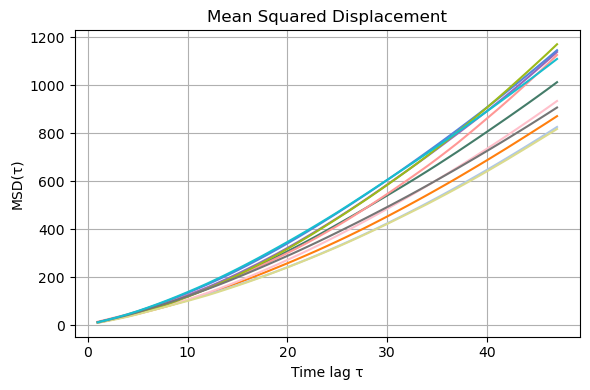

In [42]:
plt.figure(figsize=(6, 4))

dt = 1

for label in selected_labels:
    msd = msds[label]
    tau = np.arange(len(msd)) * dt
    valid = (~np.isnan(msd)) & (msd > 0)

    # Plot MSD curve
    plt.plot(tau[valid], msd[valid], c=cmap[label])
        
plt.xlabel("Time lag τ")
plt.ylabel("MSD(τ)")
plt.title("Mean Squared Displacement")
plt.grid(True)
plt.tight_layout()

## Crossing regions

In [43]:
import pickle

df_hex, labels, hex_coord, df_mean, df_norm = pickle.load(open('data/EV39_regionalization.pkl', 'rb'))
hex_coord = hex_coord / 0.2125

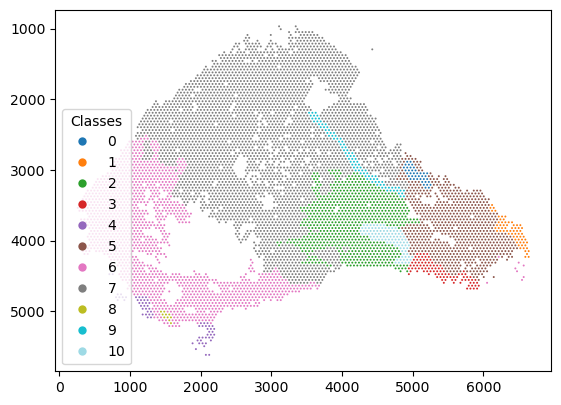

In [44]:
fig, ax = plt.subplots(1,1)

scatter = ax.scatter(hex_coord[:,0], hex_coord[:,1], lw=0, s=2, c=labels, cmap=plt.cm.tab20, label=labels)
ax.set_aspect('equal')
ax.invert_yaxis()
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")

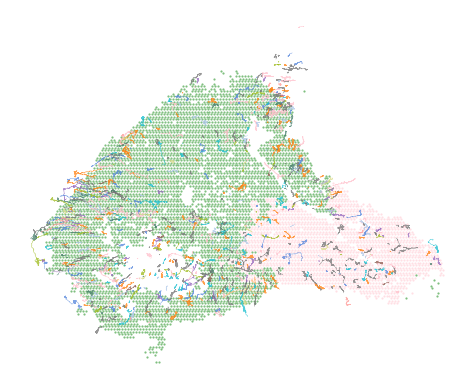

In [58]:
tracks = np.load('data/EV39_tracks.npy')
tracks = tracks + np.array([20,0]).reshape([1,2,1])
df = pd.read_csv('data/EV39_metrics.csv')

MES_regions = [0, 1, 2, 3, 5, 10]
AC_regions = [4,6,7,8]

fig, ax = plt.subplots(1,1)

MES_points = hex_coord[[x in MES_regions for x in labels],:]
AC_points = hex_coord[[x in AC_regions for x in labels],:]
ax.scatter(MES_points[:,0], MES_points[:,1], lw=0, s=2.5, c='pink', alpha=.5)
ax.scatter(AC_points[:,0], AC_points[:,1], lw=0, s=2.5, c='green', alpha=.5)
ax.set_aspect('equal')
ax.invert_yaxis()
ax.axis('off');

t = tracks.shape[-1]
for i in np.where(df['Aligned_to_Xenium'])[0]:
    xy = tracks[i,:,:]
    valid = xy[1,:] > 0
    ax.plot(xy[1,valid], xy[0,valid], c=cmap[df['Labels_GBMap'][i]], lw=.35, alpha=.75)

In [59]:
from pynndescent import NNDescent
start_coordinates = np.load('data/EV39_start.npy')
end_coordinates = np.load('data/EV39_end.npy')

filtered_coord = np.vstack([MES_points, AC_points])
MESAC_ID = np.concatenate([np.repeat('MES', MES_points.shape[0]), np.repeat('AC', AC_points.shape[0])])
index_region = NNDescent(filtered_coord)
idx, distance = index_region.query(start_coordinates[:,::-1], k=1)
idx_label_start = np.array([MESAC_ID[x] for x in idx.flatten()])

idx, distance = index_region.query(end_coordinates[:,::-1], k=1)
idx_label_end = np.array([MESAC_ID[x] for x in idx.flatten()])

In [79]:
from collections import Counter
df = pd.read_csv('data/EV39_metrics.csv')
crossed = np.where(idx_label_start != idx_label_end)[0]
print(f'Total cells: {len(crossed)}')
print(f'All: {Counter(df.Labels_GBMap[crossed])}')

print(f"From AC to MES: {Counter(df.Labels_GBMap[(idx_label_start != idx_label_end) & (idx_label_end == 'MES')])}")
print(f"From MES to AC: {Counter(df.Labels_GBMap[(idx_label_start != idx_label_end) & (idx_label_end == 'AC')])}")

Total cells: 133
All: Counter({nan: 105, 'TAM-BDM': 10, 'CD4/CD8': 4, 'Mono': 3, 'TAM-MG': 3, 'DC': 2, 'MES-like': 2, 'Endothelial': 2, 'Oligodendrocyte': 2})
From AC to MES: Counter({nan: 50, 'TAM-BDM': 8, 'Endothelial': 2, 'TAM-MG': 2, 'DC': 1, 'Oligodendrocyte': 1, 'MES-like': 1})
From MES to AC: Counter({nan: 55, 'CD4/CD8': 4, 'Mono': 3, 'TAM-BDM': 2, 'MES-like': 1, 'Oligodendrocyte': 1, 'DC': 1, 'TAM-MG': 1})


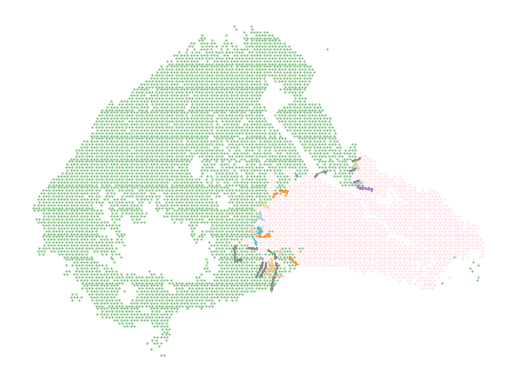

In [83]:
fig, ax = plt.subplots(1,1)

MES_points = hex_coord[[x in MES_regions for x in labels],:]
AC_points = hex_coord[[x in AC_regions for x in labels],:]
ax.scatter(MES_points[:,0], MES_points[:,1], lw=0, s=2.5, c='pink', alpha=.5)
ax.scatter(AC_points[:,0], AC_points[:,1], lw=0, s=2.5, c='green', alpha=.5)
ax.set_aspect('equal')
ax.invert_yaxis()
ax.axis('off');

t = tracks.shape[-1]
for i in crossed:
    if not pd.isnull(df.Labels_GBMap[i]):
        xy = tracks[i,:,:]
        valid = xy[1,:] > 0
        ax.plot(xy[1,valid], xy[0,valid], c=cmap[df.Labels_GBMap[i]], lw=1, alpha=.75)

/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


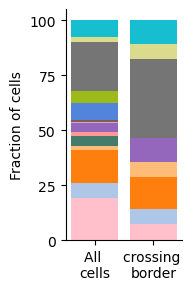

In [85]:
## Bar plots
from collections import Counter

key = 'annotation_level_3'
cmap = {'MES-like': 'pink',
 'DC': (0.6823529411764706,0.7803921568627451,0.9098039215686274,1.0),
 'CD4/CD8': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'Endothelial': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'Astrocyte': (0.17254901960784313,0.6274509803921569,0.17254901960784313,1.0),
 'AC-like': '#447c69',
 'Mast': (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 'Mono': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 'Mural cell': (0.7725490196078432,0.6901960784313725,0.8352941176470589,1.0),
 'NK': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 'NPC-like': '#5384db',
 'OPC-like': '#9cba19',
 'RG': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 'TAM-BDM': (0.4580392156862745, 0.4580392156862745, 0.4580392156862745, 1.0),
 'OPC': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 'Oligodendrocyte': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0),
 'TAM-MG': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)}

adata = sc.read_h5ad(path_adata + 'GBM_annotated.h5ad')
adatasub = adata[np.array(['EV39_TL' in x for x in adata.obs.replicate])]

crossed_ann = np.array([x for x in np.where(df['Aligned_to_Xenium'])[0] if x in crossed])
crossing_celltypes = Counter(df.Labels_GBMap[crossed_ann])
totals = np.array([adatasub.shape[0], len(crossed_ann)])
bottoms = np.array([0,0]).astype('float')

plt.figure(figsize=(1.5,3))
for k in cmap:
    vals = np.array([np.sum(np.array(adatasub.obs[key]==k)),
                     crossing_celltypes[k]]) / totals
    
    plt.bar(np.array([0,1]), height=vals, bottom=bottoms, color=cmap[k])
    bottoms += vals
plt.xticks([0,1], ['All \ncells', 'crossing \nborder'])
plt.yticks([0,.25,.5,.75,1],[0,25,50,75,100])
plt.ylabel('Fraction of cells')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)